In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


*  We measured the error size of one algorithm via loss function. We have to add all loss function outputs to get the cost function.
*  a loss function is incredibly simple: it’s a method of evaluating how well your algorithm models your dataset.
* Loss function is basicly calculating the difference between predicted value and real value of target feature. But here, we will be using a kind of specialized loss function, which is log loss (cross entry loss).
Let's examine the formula of log loss function:

−(ylog(ý)+(1−y)log(1−ý))

In [2]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda
from sklearn.model_selection import train_test_split


2024-04-12 10:59:32.377669: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 10:59:32.377813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 10:59:32.578176: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dataset=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
dataset.shape

(569, 31)

In [7]:
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
#mapping function to map different string objects to integer
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [9]:
dataset=mapping(dataset,feature="diagnosis")

In [10]:
dataset.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
69,1,12.78,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,...,13.46,19.76,85.67,554.9,0.12960,0.07061,0.1039,0.05882,0.2383,0.06410
263,0,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,...,17.91,31.67,115.90,988.6,0.10840,0.18070,0.2260,0.08568,0.2683,0.06829
417,0,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.08481,0.2085,...,23.17,27.65,157.10,1748.0,0.15170,0.40020,0.4211,0.21340,0.3003,0.10480
271,1,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,...,12.32,16.18,78.27,457.5,0.13580,0.15070,0.1275,0.08750,0.2733,0.08022
149,1,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.1564,0.06019,0.2350,0.07014


In [11]:
X=dataset.drop(["diagnosis"],axis=1)
y=dataset["diagnosis"]

In [12]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [13]:
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

Firstly, we'll use a small model which contains 3 layers with hidden units 30, 50 and 1.
Then we'll use a wider network which will also have 3 layers but more hidden units in the hidden layer which is 30,100 and 1
Then we'll use a deeper network which will have 5 layers.

In [14]:
firstModel=getModel([30,50,1])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()


# Model1

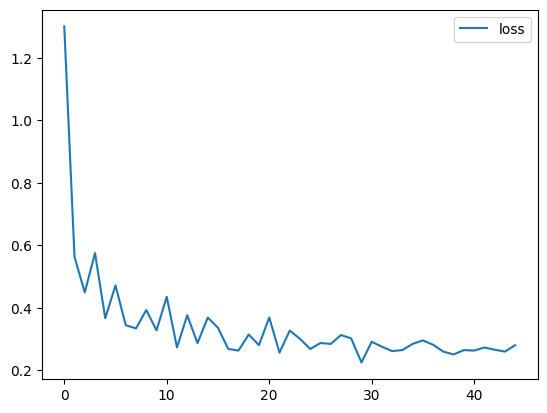

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9317 - loss: 0.2165 


In [16]:
firstModel.fit(np.array(trainX),np.array(trainY),epochs=45,callbacks=[plot_losses])

In [17]:
scores=firstModel.evaluate(np.array(valX),np.array(valY))
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9248 - loss: 0.2101  
Loss: 0.2192925661802292
Accuracy 91.20879173278809


# Model2

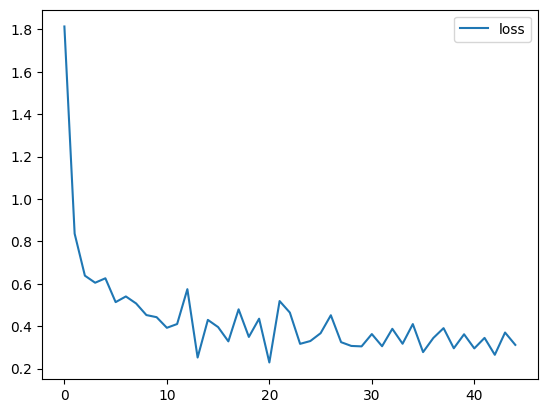

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8918 - loss: 0.3802 


In [18]:
secondModel=getModel([30,100,1])
secondModel.fit(np.array(trainX),np.array(trainY),epochs=45,callbacks=[plot_losses])

In [19]:
scores2=secondModel.evaluate(np.array(valX),np.array(valY))
print("Loss:",scores2[0])
print("Accuracy",scores2[1]*100)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6516 - loss: 0.8666  
Loss: 0.83864825963974
Accuracy 67.03296899795532


# Model3

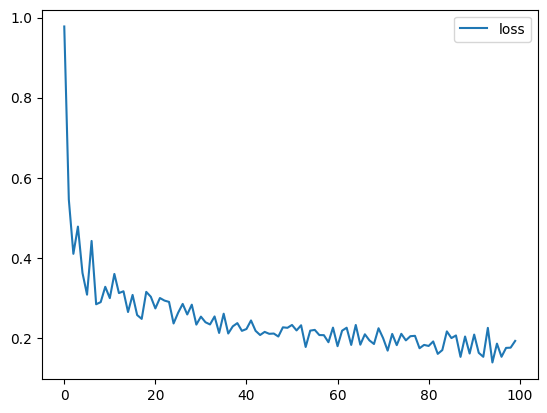

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9339 - loss: 0.1755


In [20]:
thirdModel=getModel([30,50,70,40,1])
thirdModel.fit(np.array(trainX),np.array(trainY),epochs=100,callbacks=[plot_losses])

In [21]:
scores3=thirdModel.evaluate(np.array(valX),np.array(valY))
print("Loss:",scores3[0])
print("Accuracy",scores3[1]*100)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9569 - loss: 0.1951  
Loss: 0.19871413707733154
Accuracy 94.50549483299255


In [22]:
from prettytable import PrettyTable

Models =  ['Model1','Model2','Model3']
Loss = [0.248,0.374,0.188]
Accuracy = [92.3,83.5,92.3]
Results = PrettyTable()

Results.add_column('Model', Models)
Results.add_column('Loss', Loss)
Results.add_column('Accuracy', Accuracy)



print('Results: ')
print(Results)


Results: 
+--------+-------+----------+
| Model  |  Loss | Accuracy |
+--------+-------+----------+
| Model1 | 0.248 |   92.3   |
| Model2 | 0.374 |   83.5   |
| Model3 | 0.188 |   92.3   |
+--------+-------+----------+
